## Understanding problem

You can't solve XOR problem with one neuron. If you get to have more than one neuron then you can solve the XOR problem. There is no way to seperate the hyperplane (fig below - to seperate red and green point) with just one line so you need hidden layers to solve this. 

In XOR, when both attribute are either 0 or 1, then it's a negative class and when one of the attribute/parameter is 0 or 1 then it's a positive class. 

### XOR TABLE 

| Input           | Output |
| :-------------: | :---:  |
| <table><tr><th>A</th><th>B</th></tr><tr><td>0</td><td>0</td></tr><tr><td>0</td><td>1</td></tr><tr><td>1</td><td>0</td></tr><tr><td>1</td><td>1</td></tr></table>  | <table><tr><th>A ⊕ B</th></tr><tr><td>0</td></tr><tr><td>1</td></tr><tr><td>1</td></tr><tr><td>0</td></tr></table>|

<!-- 
# from IPython.display import Image
# Image(filename = "/content/XOR problem.PNG")
-->


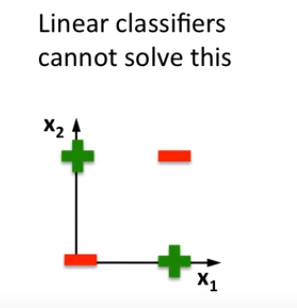

### Coding in Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Activation function


In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Sigmoid derivative for backpropagation


In [3]:
def sigmoid_derivative(x):
  # sig = sigmoid(x)
  # return sig * (1 - sig)
  return x * (1 - x)

### Initialzing input and output values - as in XOR table

In [4]:
# input parameters
inputs = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

# output parameters
outputs = np.array([[0], [1], [1], [0]])

### Feed Forward network

In [5]:
def forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias):

  hidden_layer_activation = np.dot(inputs, hidden_weights)
  hidden_layer_activation += hidden_bias

  hidden_layer_output = sigmoid(hidden_layer_activation)

  output_layer_activation = np.dot(hidden_layer_output, output_weights)
  output_layer_activation += output_bias

  predicted_output = sigmoid(output_layer_activation)

  return predicted_output, hidden_layer_output

### Backward propagation step

In [6]:
def backward_pass(expected_output, predicted_output, output_weights, hidden_layer_output):

  error = expected_output - predicted_output

  d_predicted_output = error * sigmoid_derivative(predicted_output)

  error_hidden_layer = d_predicted_output.dot(output_weights.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  return d_predicted_output, d_hidden_layer

### Setting hyperparamters

In [7]:
# initializing learning rate
lr = 0.1

# total epochs
epochs = 20000

# we'r taking 2 hidden layer neuron since XOR couldn't be solved using single decision plane
# 1 output layer neuron for single output
# 2 input layer neuron to pass 2 inputs to the Gate (0/1)

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1

## Training Neural Network

In [8]:
def train(epochs, lr, inputs, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons):

  # Initializing random weights and biases for training

  hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))

  hidden_bias =np.random.uniform(size=(1, hiddenLayerNeurons))

  output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))

  output_bias = np.random.uniform(size=(1, outputLayerNeurons))

  for epoch in range(epochs):

    # forward pass
    predicted_output, hidden_layer_output = forward_pass(inputs, hidden_weights, hidden_bias, output_weights, output_bias)

    # backward pass
    d_predicted_output, d_hidden_layer = backward_pass(outputs, predicted_output, output_weights, hidden_layer_output)

    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr

    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr

    hidden_weights += inputs.T.dot(d_hidden_layer) * lr

    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

    if epoch % 1000 == 0:
      print(f"Training.... epoch: {epoch}")
    if epoch == epochs:
      print('Training completed!')

  return predicted_output

In [9]:
predicted_output = train(epochs, lr, inputs, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons)

Training.... epoch: 0
Training.... epoch: 1000
Training.... epoch: 2000
Training.... epoch: 3000
Training.... epoch: 4000
Training.... epoch: 5000
Training.... epoch: 6000
Training.... epoch: 7000
Training.... epoch: 8000
Training.... epoch: 9000
Training.... epoch: 10000
Training.... epoch: 11000
Training.... epoch: 12000
Training.... epoch: 13000
Training.... epoch: 14000
Training.... epoch: 15000
Training.... epoch: 16000
Training.... epoch: 17000
Training.... epoch: 18000
Training.... epoch: 19000


### Predicted Output

In [10]:
print(predicted_output)

[[0.03381909]
 [0.97018273]
 [0.97002818]
 [0.03152204]]


In [12]:
for val in predicted_output:
  print(np.round(val))

[0.]
[1.]
[1.]
[0.]


**NOTE:** As you can see above, the prediction are almost accurate (97% accurate) as the round value is close to 0 and 1 for respective inputs. Recall from above XOR truth table, this predicted values are same as expected output for XOR gate i.e it yeilds true output only when both its inputs differ from each other.

# **Thank You!** 
Feel free to make the suggestions!